<a href="https://colab.research.google.com/github/tmichaletzky/datamining2021/blob/main/GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Kaggle

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp "drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cosmos98/twitter-and-reddit-sentimental-analysis-dataset

 50% 5.00M/10.0M [00:00<00:00, 28.3MB/s]
100% 10.0M/10.0M [00:00<00:00, 49.1MB/s]


In [ ]:
!unzip /content/twitter-and-reddit-sentimental-analysis-dataset.zip

Archive:  /content/twitter-and-reddit-sentimental-analysis-dataset.zip
  inflating: Reddit_Data.csv         
  inflating: Twitter_Data.csv        


# Import packages

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
#import tweepy as tw #for accessing Twitter API

# For Building the model
from sklearn.model_selection import train_test_split
#import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# Read and clean data

In [ ]:
df = pd.read_csv("Reddit_Data.csv")
df = df.rename(columns={'clean_comment':'text', 'category':'score'})
df.head(10)

,text,score
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
5,you should all sit down together and watch the...,-1
6,was teens when discovered zen meditation was ...,1
7,jesus was zen meets jew,0
8,there are two varieties christians dogmatic th...,-1
9,dont worry about trying explain yourself just ...,1


In [ ]:
df.describe().loc["count"]

score    37249.0
Name: count, dtype: float64

In [ ]:
df.isnull().sum() #100 adat hiányzik

text     100
score      0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True) #NA adatok eldobása

In [ ]:
df.shape

(37149, 2)

# Insights

In [ ]:
df["sentiment"] = df["score"].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df.head(10)

,text,score,sentiment
0,family mormon have never tried explain them t...,1,Positive
1,buddhism has very much lot compatible with chr...,1,Positive
2,seriously don say thing first all they won get...,-1,Negative
3,what you have learned yours and only yours wha...,0,Neutral
4,for your own benefit you may want read living ...,1,Positive
5,you should all sit down together and watch the...,-1,Negative
6,was teens when discovered zen meditation was ...,1,Positive
7,jesus was zen meets jew,0,Neutral
8,there are two varieties christians dogmatic th...,-1,Negative
9,dont worry about trying explain yourself just ...,1,Positive


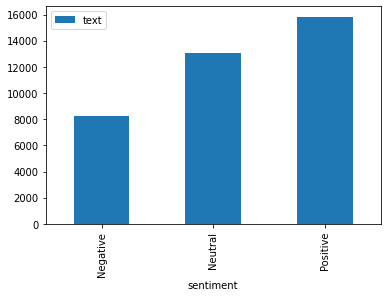

In [ ]:
df.drop(columns="score").groupby("sentiment").count().plot(kind="bar")

In [ ]:
df["length"] = df.text.str.split().apply(len) #get num of words of text

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10db5fbc50>,
      dtype=object)

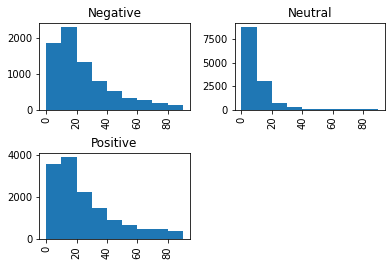

In [ ]:
df["length"].hist(by=df["sentiment"], bins=range(0,100,10))

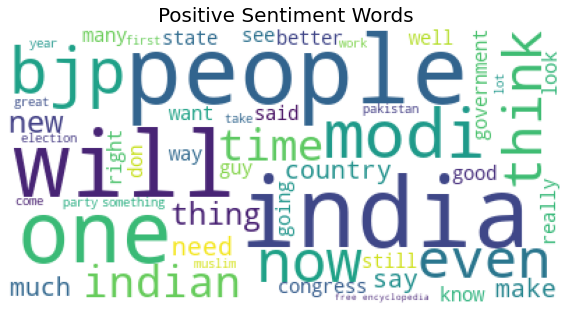

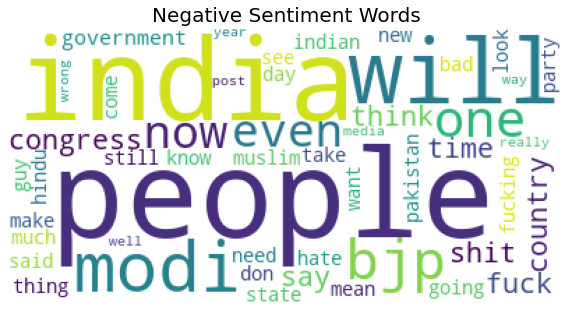

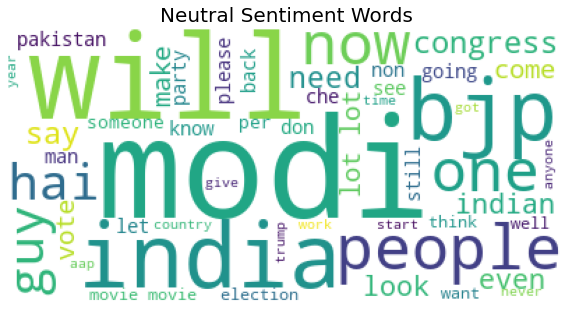

In [ ]:
#### Visualizing data into wordclouds


from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.sentiment==category]['text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 'Positive')
     
# Negative tweet words
wordcount_gen(df, 'Negative')
     
# Neutral tweet words
wordcount_gen(df, 'Neutral')

# Text preprocessing

In [ ]:
#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def text_preprocess(text):
    ''' Convert tweet text into a sequence of words '''
    # convert to lowercase
    text = text.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    #apply lemmatize
    words = [WordNetLemmatizer().lemmatize(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['text'][0])
print("\nProcessed tweet ->", text_preprocess(df['text'][0]))


Original tweet ->  family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches 

Processed tweet -> ['famili', 'mormon', 'never', 'tri', 'explain', 'still', 'stare', 'puzzl', 'time', 'time', 'like', 'kind', 'strang', 'creatur', 'nonetheless', 'come', 'admir', 'patienc', 'calm', 'equanim', 'accept', 'compass', 'develop', 'thing', 'buddhism', 'teach']


In [ ]:
X = list(map(text_preprocess, df["text"]))

In [ ]:
Y = list(df["score"])

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
X = np.array(X)
X_tr = np.asarray(X_tr)
y_tr = np.asarray(y_tr)
X_te = np.asarray(X_te)
y_te = np.asarray(y_te)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# GloVe
https://www.kaggle.com/parthplc/glove-implementation/notebook

In [ ]:
from scipy import spatial
from sklearn.manifold import TSNE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf
tf.data.experimental.enable_debug_mode()


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-12-04 07:50:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-04 07:50:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-04 07:50:15--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!ls
!pwd

drive		   glove.6B.zip
glove.6B.100d.txt  Reddit_Data.csv
glove.6B.200d.txt  sample_data
glove.6B.300d.txt  twitter-and-reddit-sentimental-analysis-dataset.zip
glove.6B.50d.txt   Twitter_Data.csv
/content


In [ ]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.200d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [ ]:
!pip install --upgrade pip
!pip install -U -q pydrive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
embedding_dict={}
with open('glove.6B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [ ]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [ ]:
corpus = create_corpus(df)

100%|██████████| 37149/37149 [00:07<00:00, 4865.87it/s]


In [ ]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [ ]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 49914


In [ ]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,200))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 49914/49914 [00:00<00:00, 428623.03it/s]


## LSTM

In [ ]:
model=Sequential()

embedding=Embedding(num_words,200,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax')) 


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='categorical_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 200)           9983000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 50, 200)          0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 64)                67840     
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 10,051,035
Trainable params: 68,035
Non-trainable params: 9,983,000
_________________________________________________________________


In [ ]:
train=tweet_pad[:X.shape[0]]
test=tweet_pad[X.shape[0]:]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train,df['score'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of validation ",X_test.shape)

Shape of train (31576, 50)
Shape of validation  (5573, 50)


In [ ]:
y_null = []
for i in range(0,len(y_test)):
  if y_test[i] == 0:
    y_null.append([0, 1, 0])
  if y_test[i] == 1:
    y_null.append([0, 0, 1])
  if y_test[i] == -1:
    y_null.append([1, 0, 0])
print(y_test)
print(y_null)

[ 1  0  1 ...  1  0 -1]
[[0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 

In [ ]:
y_nonnull = []
for i in range(0,len(y_train)):
  if y_train[i] == 0:
    y_nonnull.append([0, 1, 0])
  if y_train[i] == 1:
    y_nonnull.append([0, 0, 1])
  if y_train[i] == -1:
    y_nonnull.append([1, 0, 0])

In [ ]:
y_null = np.array(y_null)

In [ ]:
y_nonnull = np.array(y_nonnull)

In [ ]:
history=model.fit(X_train,y_nonnull,batch_size=4,epochs=5,validation_data=(X_test,y_null),verbose=1)

Epoch 1/5
7894/7894 [==============================] - 360s 45ms/step - loss: 0.9776 - accuracy: 0.5396 - val_loss: 0.8843 - val_accuracy: 0.5911
Epoch 2/5
7894/7894 [==============================] - 361s 46ms/step - loss: 0.8749 - accuracy: 0.5991 - val_loss: 0.8566 - val_accuracy: 0.6031
Epoch 3/5
7894/7894 [==============================] - 359s 46ms/step - loss: 0.8553 - accuracy: 0.6091 - val_loss: 0.8431 - val_accuracy: 0.6106
Epoch 4/5
7894/7894 [==============================] - 359s 45ms/step - loss: 0.8446 - accuracy: 0.6150 - val_loss: 0.8324 - val_accuracy: 0.6192
Epoch 5/5
7894/7894 [==============================] - 360s 46ms/step - loss: 0.8373 - accuracy: 0.6186 - val_loss: 0.8270 - val_accuracy: 0.6223


In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1) - 1
print(y_pred)
print(y_test)

[1 0 0 ... 1 1 1]
[ 1  0  1 ...  1  0 -1]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   1  188 1098]
 [   0 1370  529]
 [   0  290 2097]]
              precision    recall  f1-score   support

          -1       1.00      0.00      0.00      1287
           0       0.74      0.72      0.73      1899
           1       0.56      0.88      0.69      2387

    accuracy                           0.62      5573
   macro avg       0.77      0.53      0.47      5573
weighted avg       0.72      0.62      0.54      5573



Text(0.5, 257.44, 'Predicted label')

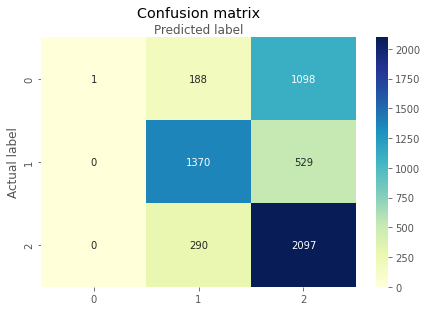

In [ ]:
class_names=[-1, 0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## K-neighbours

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 301  376  596]
 [ 308 1211  395]
 [ 577  668 1141]]
              precision    recall  f1-score   support

          -1       0.25      0.24      0.24      1273
           0       0.54      0.63      0.58      1914
           1       0.54      0.48      0.51      2386

    accuracy                           0.48      5573
   macro avg       0.44      0.45      0.44      5573
weighted avg       0.47      0.48      0.47      5573



Text(0.5, 257.44, 'Predicted label')

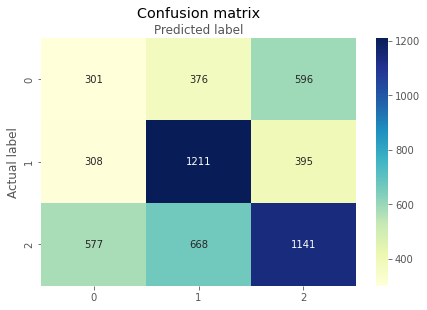

In [ ]:
class_names=[-1, 0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

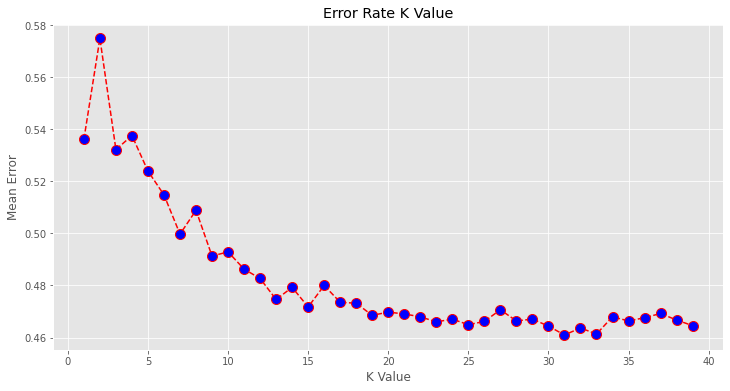

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Bernoulli NB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [ ]:
y_pred = BernoulliNB().fit(X_train, y_train).predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  88  797  388]
 [  66 1774   74]
 [ 154 1397  835]]
              precision    recall  f1-score   support

          -1       0.29      0.07      0.11      1273
           0       0.45      0.93      0.60      1914
           1       0.64      0.35      0.45      2386

    accuracy                           0.48      5573
   macro avg       0.46      0.45      0.39      5573
weighted avg       0.49      0.48      0.43      5573



In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[  88  797  388]
 [  66 1774   74]
 [ 154 1397  835]]


Text(0.5, 257.44, 'Predicted label')

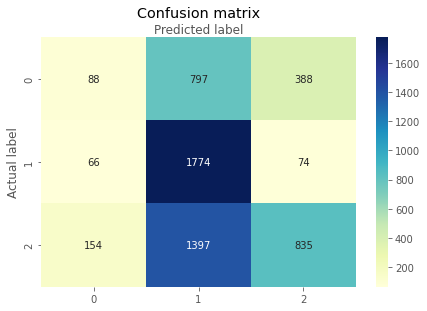

In [ ]:
class_names=[-1, 0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

In [ ]:
y_lrtest = []
for i in range(0, len(y_test)):
  y_lrtest.append(y_test[i]+1)

In [ ]:
y_lrtrain = []
for i in range(0, len(y_train)):
  y_lrtrain.append(y_train[i]+1)

In [ ]:
logreg = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=300)
logreg.fit(X_train, y_lrtrain)

LogisticRegression(max_iter=300, multi_class='ovr', solver='liblinear')

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
print(confusion_matrix(y_lrtest, y_pred))
print(classification_report(y_lrtest, y_pred))
cnf_matrix = metrics.confusion_matrix(y_lrtest, y_pred)

[[   0  264 1009]
 [   0  864 1050]
 [   1  488 1897]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1273
           1       0.53      0.45      0.49      1914
           2       0.48      0.80      0.60      2386

    accuracy                           0.50      5573
   macro avg       0.34      0.42      0.36      5573
weighted avg       0.39      0.50      0.42      5573



Text(0.5, 257.44, 'Predicted label')

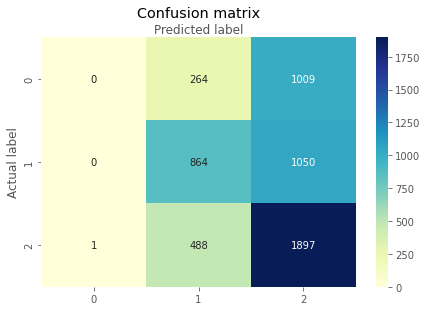

In [ ]:
class_names=[-1, 0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')